## Graphical analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
csv_location = '/app/src/assessments/poo/jobs_in_data.csv'
jobs_data = pd.read_csv(csv_location)
jobs_data.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


### Number of observations by year

In [3]:
observations_by_year = jobs_data[['work_year', 'job_title']].groupby('work_year').count()
observations_by_year.columns = ['count']
observations_by_year

,count
work_year,
2020,71
2021,197
2022,1634
2023,7453


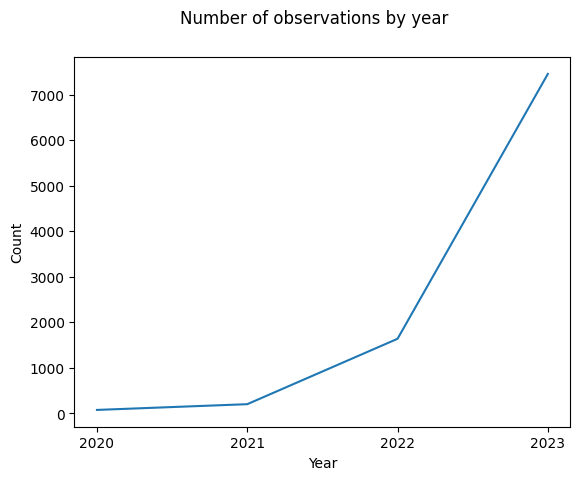

In [4]:
plt.plot(observations_by_year.index, observations_by_year['count'])
plt.suptitle('Number of observations by year')
plt.xticks(observations_by_year.index)
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

### Salary in usd by title

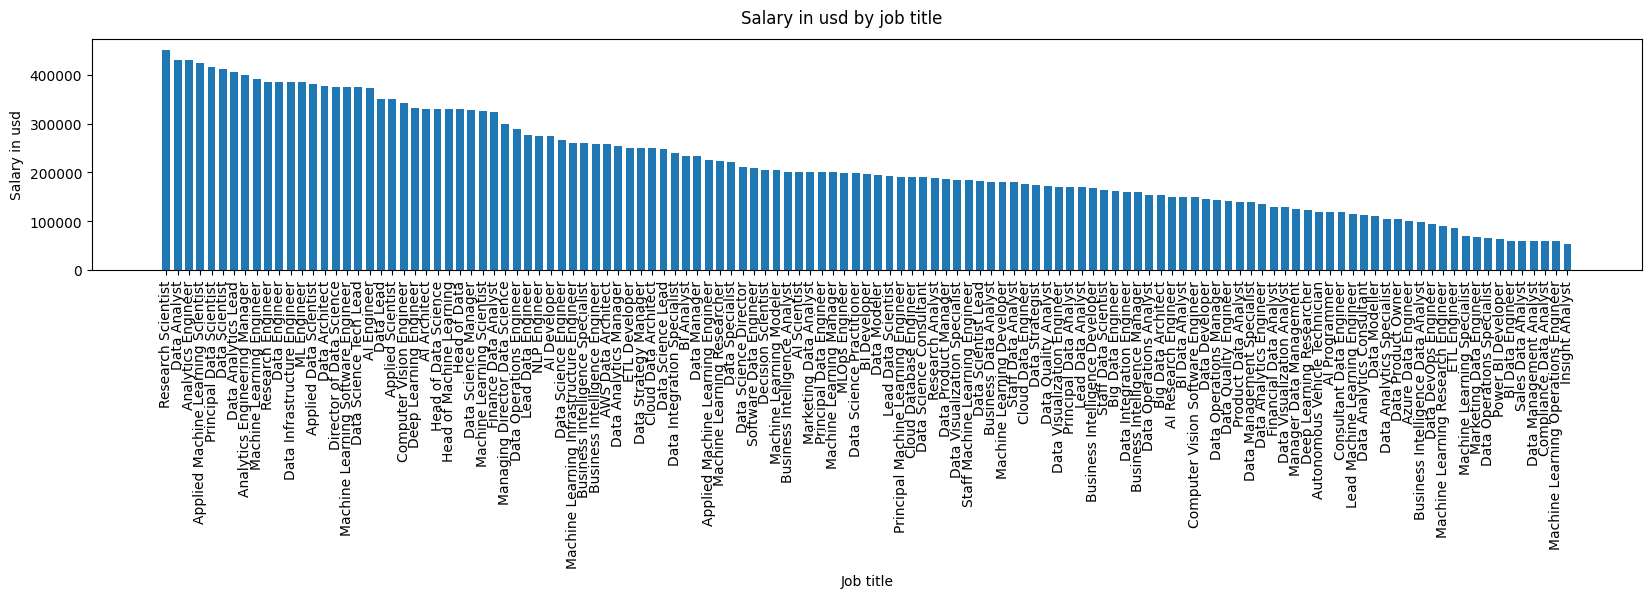

In [5]:
salary_by_title = jobs_data[['work_year','salary_in_usd', 'job_title']].sort_values(by=['salary_in_usd'], ascending = False)
plt.figure(figsize=(20,3))
plt.bar(salary_by_title['job_title'], salary_by_title['salary_in_usd'], width=0.7)
plt.suptitle('Salary in usd by job title')
plt.xlabel('Job title')
plt.xticks(rotation=90)
plt.ylabel('Salary in usd')
plt.show()

##### This chart is not so good because there are a lot of different values (salaries) for the same job title, so it would be better to plot the average by the job title

In [6]:
# Example of repetition (but the chart just show the first occurence)
salary_by_title.loc[salary_by_title['job_title'] == 'Machine Learning Infrastructure Engineer']

,work_year,salary_in_usd,job_title
2109,2023,260000,Machine Learning Infrastructure Engineer
2110,2023,235000,Machine Learning Infrastructure Engineer
2146,2023,221000,Machine Learning Infrastructure Engineer
2103,2023,220000,Machine Learning Infrastructure Engineer
6753,2023,205920,Machine Learning Infrastructure Engineer
6602,2023,205920,Machine Learning Infrastructure Engineer
9284,2021,195000,Machine Learning Infrastructure Engineer
8617,2022,186000,Machine Learning Infrastructure Engineer
2630,2023,185000,Machine Learning Infrastructure Engineer
2147,2023,180000,Machine Learning Infrastructure Engineer


In [7]:
salary_in_usd_average_by_title = salary_by_title[['salary_in_usd', 'job_title']].groupby('job_title').mean().sort_values(by=['salary_in_usd'], ascending = False)
salary_in_usd_average_by_title

,salary_in_usd
job_title,
Analytics Engineering Manager,399880.000
Data Science Tech Lead,375000.000
Managing Director Data Science,300000.000
Head of Machine Learning,259000.000
AWS Data Architect,258000.000
...,...
Data Management Analyst,56000.000
Data Operations Specialist,55355.000
Machine Learning Specialist,55000.000


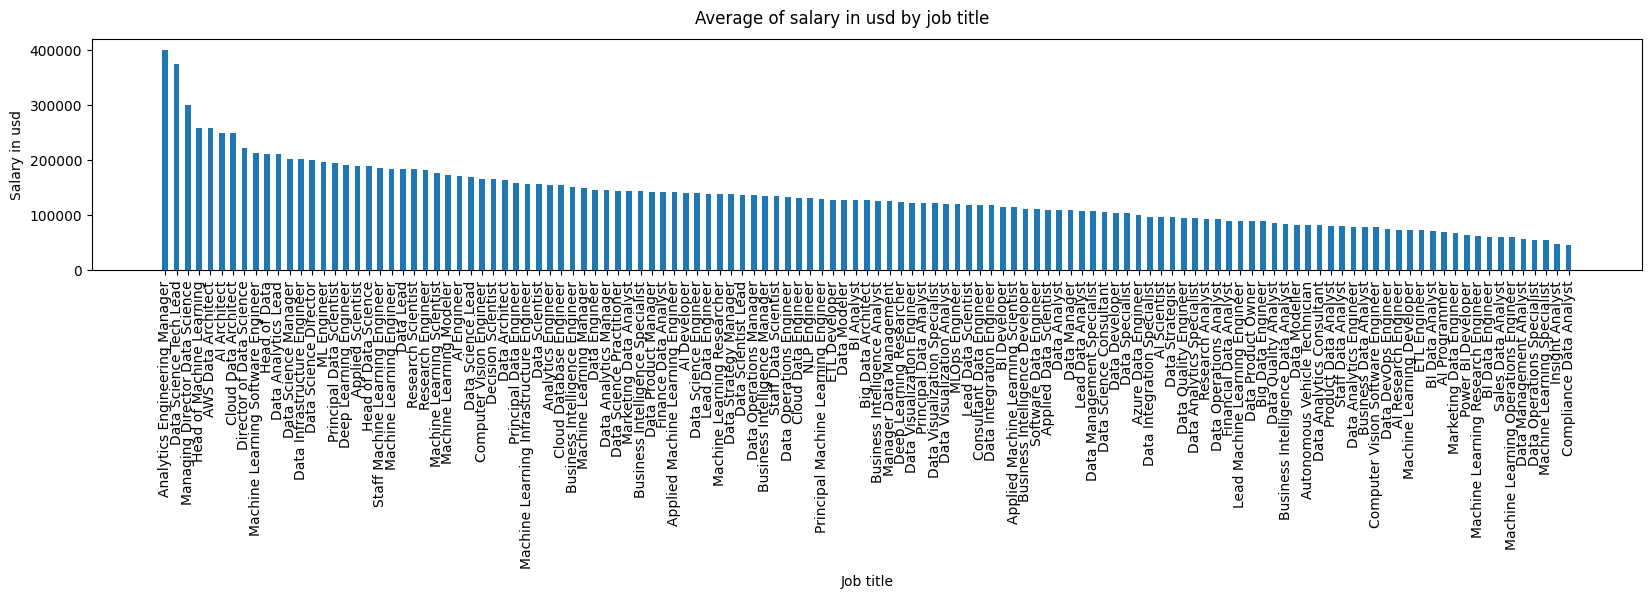

In [8]:
plt.figure(figsize=(20,3))
plt.bar(salary_in_usd_average_by_title.index, salary_in_usd_average_by_title['salary_in_usd'], width=0.5)
plt.suptitle('Average of salary in usd by job title')
plt.xlabel('Job title')
plt.xticks(rotation=90)
plt.ylabel('Salary in usd')
plt.show()

### Number of observations by category in 2023

In [9]:
observations_by_category_in_2023 = jobs_data.loc[jobs_data['work_year'] == 2023][['work_year','job_category']].groupby('job_category').count()
observations_by_category_in_2023.columns = ['count']
observations_by_category_in_2023.sort_values(by=['count'], ascending=True, inplace=True)
observations_by_category_in_2023

,count
job_category,
Cloud and Database,3
Data Quality and Operations,43
Data Management and Strategy,48
Data Architecture and Modeling,208
BI and Visualization,305
Leadership and Management,414
Data Analysis,1125
Machine Learning and AI,1195
Data Engineering,1699


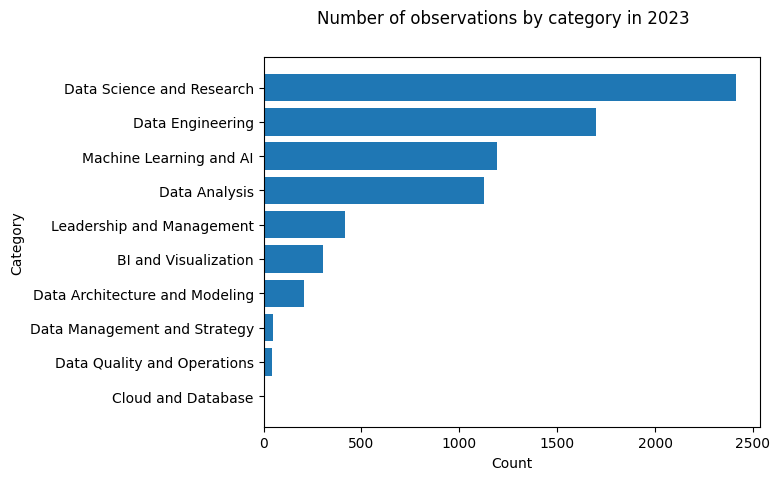

In [10]:
plt.barh(observations_by_category_in_2023.index, observations_by_category_in_2023['count'])
plt.suptitle('Number of observations by category in 2023')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

### Salary by category in 2022

In [11]:
salary_average_by_category = jobs_data.loc[jobs_data['work_year'] == 2022][['salary', 'job_category']].groupby('job_category').mean().sort_values(by=['salary'], ascending=False)
salary_average_by_category

,salary
job_category,
Cloud and Database,175000.000000
Data Architecture and Modeling,166091.543478
Machine Learning and AI,144652.892473
Data Science and Research,143116.666000
Data Engineering,138461.342685
Leadership and Management,136049.625000
Data Management and Strategy,113750.000000
Data Analysis,106922.567474
BI and Visualization,100875.000000


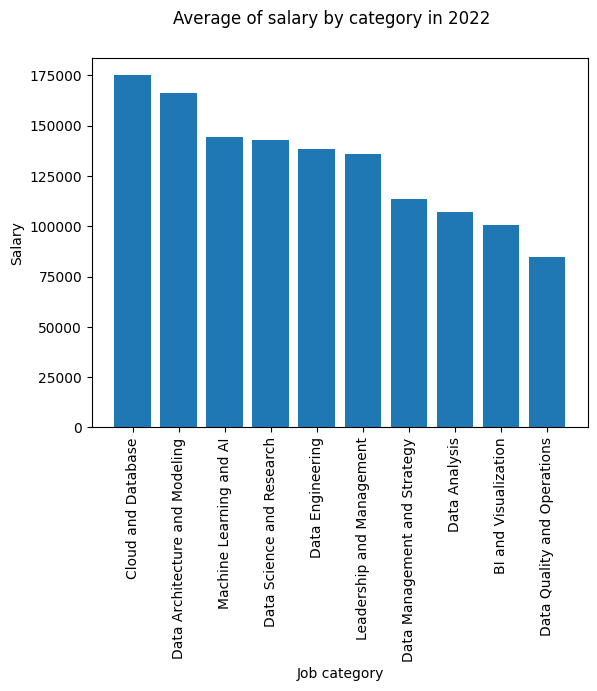

In [12]:
plt.bar(salary_average_by_category.index, salary_average_by_category['salary'])
plt.suptitle('Average of salary by category in 2022')
plt.xlabel('Job category')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

### Experience level for "Data analyst"

In [13]:
experience_level = jobs_data.loc[jobs_data['job_title'] == 'Data Analyst'][['job_title', 'experience_level']].groupby('experience_level').count()
experience_level.columns = ['count']
experience_level.sort_values(by=['count'], ascending=True, inplace=True)
experience_level

,count
experience_level,
Executive,14
Entry-level,119
Mid-level,363
Senior,892


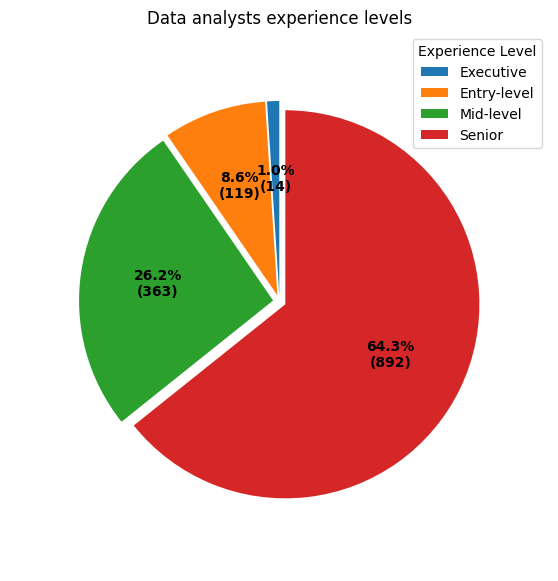

In [14]:
def format_data(pct, all_values):
    absolute = round(pct / 100 * sum(all_values))
    return f"{pct:.1f}%\n({absolute:d})"

fig, ax = plt.subplots(figsize=(7,7))
wedges, texts, autotexts = ax.pie(
    x=experience_level['count'],
    explode=[0.03 for x in range(experience_level['count'].size)],
    startangle=90,
    autopct=lambda pct: format_data(pct, experience_level['count']),
    radius=0.9
)
ax.legend(wedges, experience_level.index, title='Experience Level')
ax.set_title('Data analysts experience levels')
plt.setp(autotexts, size=10, weight="bold")
fig.show()

### Company size

In [15]:
experience_level = jobs_data[['work_year', 'company_size']].groupby('company_size').count()
experience_level.columns = ['count']
experience_level.sort_values(by=['count'], ascending=True, inplace=True)
experience_level

,count
company_size,
S,159
L,748
M,8448


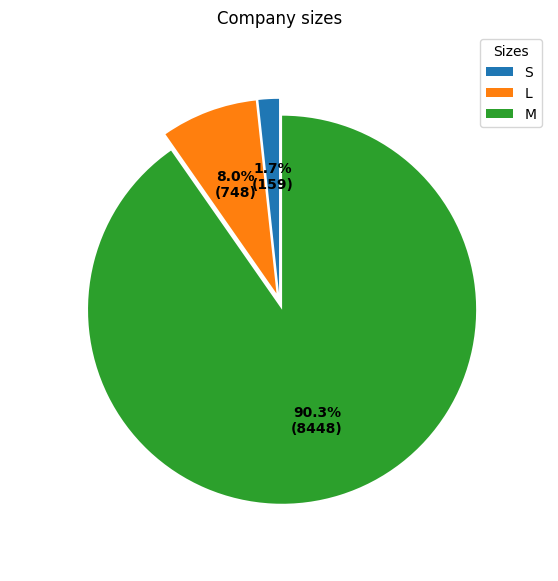

In [16]:
fig, ax = plt.subplots(figsize=(7,7))
wedges, texts, autotexts = ax.pie(
    x=experience_level['count'],
    explode=[0.04 for x in range(experience_level['count'].size)],
    startangle=90,
    autopct=lambda pct: format_data(pct, experience_level['count']),
    radius=0.9
)
ax.legend(wedges, experience_level.index, title='Sizes')
ax.set_title('Company sizes')
plt.setp(autotexts, size=10, weight="bold")
fig.show()